In this notebook I will read the netcdf files created from .raw files through echopype

In [3]:
import echopype as ep
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt
import sys

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
nc_path = 'D:GLIDER2018/Echosounder/Echosounder/nc_files/GLIDER_SB_2018_v5-Phase0-D20180625-T173106-0.nc'

In [3]:
ed = ep.open_converted(nc_path)

In [7]:
ed.beam.ga

<xarray.Dataset>
Dimensions:                        (frequency: 1, ping_time: 173, quadrant: 3, range_bin: 25296)
Coordinates:
  * frequency                      (frequency) float64 3.33e+05
  * ping_time                      (ping_time) datetime64[ns] 2018-06-25T17:3...
  * range_bin                      (range_bin) int32 0 1 2 ... 25293 25294 25295
  * quadrant                       (quadrant) int32 0 1 2
Data variables: (12/24)
    channel_id                     (frequency) object 'EKA 253618-07 ES333-7C...
    beam_type                      (frequency) int32 17
    beamwidth_twoway_alongship     (frequency) float64 7.0
    beamwidth_twoway_athwartship   (frequency) float64 7.0
    beam_direction_x               (frequency) float64 nan
    beam_direction_y               (frequency) float64 nan
    ...                             ...
    frequency_start                (frequency, ping_time) int32 283000 ... 28...
    frequency_end                  (frequency, ping_time) int32 383000 ... 38...
    sample_interval                (frequency, ping_time) float64 8e-06 ... 8...
    transmit_power                 (frequency, ping_time) float64 50.0 ... 50.0
    transmit_duration_nominal      (frequency, ping_time) float32 0.001024 .....
    slope                          (frequency, ping_time) float64 0.006902 .....
Attributes:
    beam_mode:              vertical
    conversion_equation_t:  type_3

In [4]:
ds_Sv = ep.calibrate.compute_Sv(ed, waveform_mode='BB', encode_mode='complex')

In [5]:
ds_Sv

<xarray.Dataset>
Dimensions:                (frequency: 1, ping_time: 173, range_bin: 25296)
Coordinates:
  * ping_time              (ping_time) datetime64[ns] 2018-06-25T17:31:07.964...
  * frequency              (frequency) float64 3.33e+05
  * range_bin              (range_bin) int32 0 1 2 3 ... 25292 25293 25294 25295
Data variables:
    Sv                     (frequency, ping_time, range_bin) float64 nan ... ...
    range                  (frequency, ping_time, range_bin) float64 0.0 ... ...
    temperature            (ping_time) float64 8.0 nan nan nan ... nan nan nan
    salinity               (ping_time) float64 35.0 nan nan nan ... nan nan nan
    pressure               (ping_time) float64 5.0 nan nan nan ... nan nan nan
    sound_speed            (ping_time) float64 1.482e+03 nan nan ... nan nan nan
    sound_absorption       (ping_time, frequency) float64 0.08015 nan ... nan
    sa_correction          (frequency) float64 ...
    gain_correction        (frequency) float64 ...
    equivalent_beam_angle  (frequency) float64 ...

Replace range_bin coorinates to be depth (or range in the xarray)

In [289]:
ds_Sv.coords['range_bin']=np.array(ds_Sv.range[0,0,:])

## Plot!

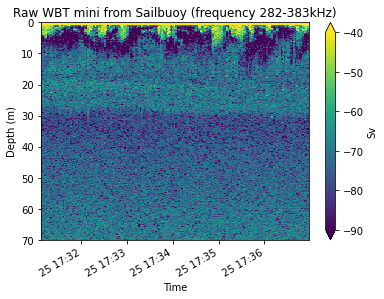

In [290]:
ds_Sv.Sv.plot(y="range_bin", cmap='viridis',vmax=-40,vmin=-90)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.ylim([70,0])
plt.xlabel('Time')
plt.title('Raw WBT mini from Sailbuoy (frequency 282-383kHz)');